In [50]:
#沿用上一次的作业生成数据集
import numpy as np
def get_data(num,expect,variation):
    m=np.array(expect)
    s=np.array(variation)
    raw=np.random.multivariate_normal(m,s,num)
    return raw
def get_dataset(num,expect1,variation1,expect2,variation2):
    raw=get_data(num,expect1,variation1)
    ones=np.ones((num,1))
    aug_data=np.concatenate([ones,raw],axis=1)
    labels=np.ones((num,1))
    final_data=np.concatenate([aug_data,labels],axis=1)
    raw_1=get_data(num,expect2,variation2)
    neg_labels=-np.ones((num,1))
    aug_data_1=np.concatenate([ones,raw_1],axis=1)
    final_data_1=np.concatenate([aug_data_1,neg_labels],axis=1)
    dataset=np.concatenate([final_data,final_data_1],axis=0)
    #打乱
    np.random.shuffle(dataset)
    return dataset
source_data=get_dataset(200,[-5,0],[[1,0],[0,1]],[0,5],[[1,0],[0,1]])
print('shape of dataset:',source_data.shape)
#数据集划分
train_set=source_data[0:320]
test_set=source_data[320:]

shape of dataset: (400, 4)


In [51]:
#SGD
def SGD(train_set,learning_rate,rand_init=True,error=1e-5,max_iter=20,batch_size=10):
    B=batch_size
    loss_epoch=[]
    if rand_init==True:
        np.random.seed(4)
        w=np.random.normal(0,1,3)
    else:
        w=np.array([0,0,0])
    for i in range(max_iter):
        batch_idx=np.random.choice(train_set.shape[0],B,replace=False)
        batch=train_set[batch_idx,:]
        X=batch[:,0:-1]
        Y=batch[:,-1]
        #求loss
        raw_loss=np.log(1+np.exp(-np.sum(w*X,-1)*Y))
        loss=float(np.sum(raw_loss,0)/B)
        loss_epoch.append(loss)
        #求梯度
        raw_grad=((1/(1+np.exp(np.sum(w*X,-1)*Y)))*(-Y)).reshape(-1,1)*X
        grad=np.sum(raw_grad,0)/B
        w=w-learning_rate*grad
        if np.linalg.norm(w)<error:
            break
    return w,loss_epoch

In [52]:
w,loss=SGD(train_set,0.4,True,1e-5,20,10)

In [53]:
#分类，并计算准确率,所谓的概率值即是下面的1/(1+np.exp(-np.dot(weight,test_set[j,0:-1])))
#测试函数
def eval(test_set,weight):
    error_rate=0
    for j in range(test_set.shape[0]):
        if (1/(1+np.exp(-np.dot(weight,test_set[j,0:-1])))-0.5)*test_set[j,-1]<0:
            error_rate+=1
    print('正确率为:{}%'.format((1-error_rate/test_set.shape[0])*100))

In [54]:
#测试
print('训练集正确率：')
eval(train_set,w)
print('测试集正确率：')
eval(test_set,w)

训练集正确率：
正确率为:100.0%
测试集正确率：
正确率为:100.0%


In [55]:
#画图函数
#从上一次作业照搬过来
#按理来说，我们应该用概率值生成分类面，但是因为logistic regression求出来的w可用于估计感知机的w,所以此处不加区分
import matplotlib.pyplot as plt
def draw(dataset, weight):
    x_po= []
    y_po= []
    x_ne= []
    y_ne= []
    for i in range(dataset.shape[0]):
        if dataset[i][-1] == 1:
            x_po.append(dataset[i][1])
            y_po.append(dataset[i][2])
        elif dataset[i][-1] == -1:
            x_ne.append(dataset[i][1])
            y_ne.append(dataset[i][2])

    x_line=np.linspace(-9, 9, 100)
    y_line = -(weight[1] / weight[2]) * x_line + weight[0] / weight[2]
    plt.scatter(x_po, y_po, color='red', s=50, label='positive')
    plt.scatter(x_ne, y_ne, color='green', s=50, label='negative')
    plt.plot(x_line, y_line, color='yellow', label='boundary')
    plt.legend(loc='best')
    plt.show()

训练集为：


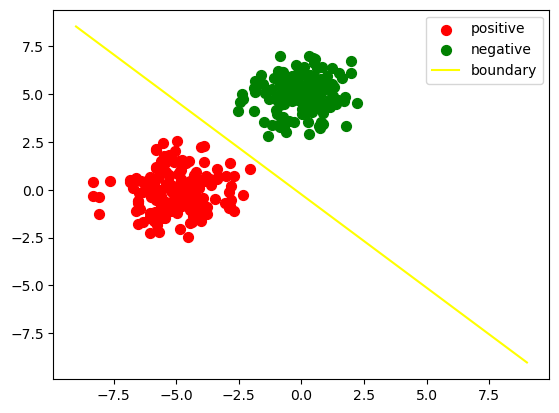

测试集为：


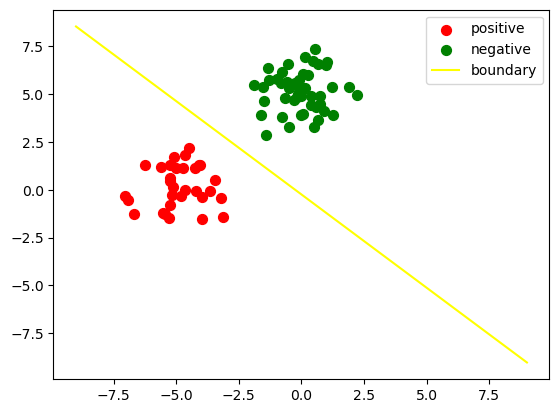

In [56]:
print('训练集为：')
draw(train_set,w)
print('测试集为：')
draw(test_set,w)

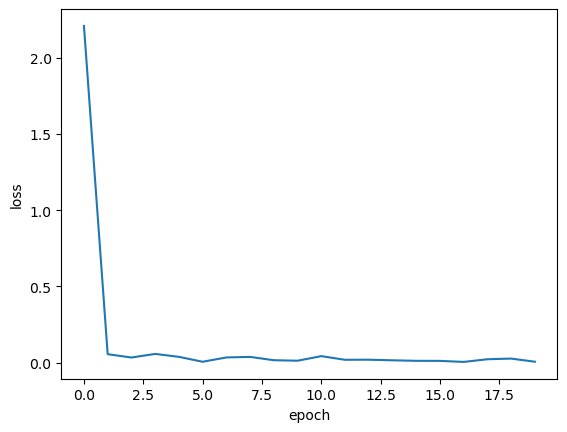

In [57]:
#下面是画loss函数
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

训练集正确率：
正确率为:98.125%
测试集正确率：
正确率为:98.75%
训练集为：


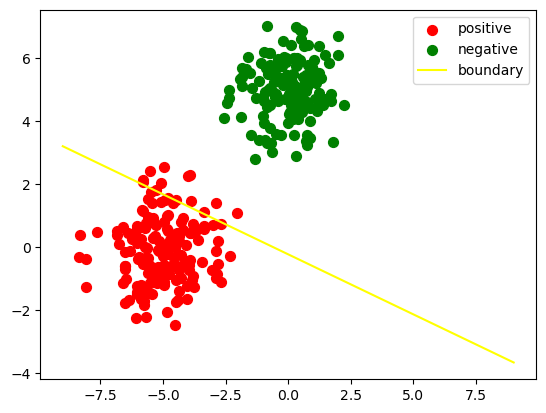

测试集为：


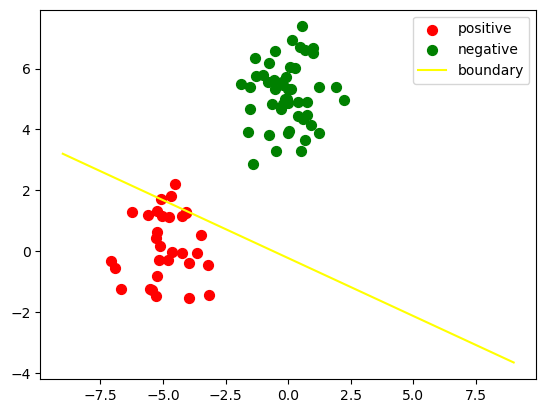

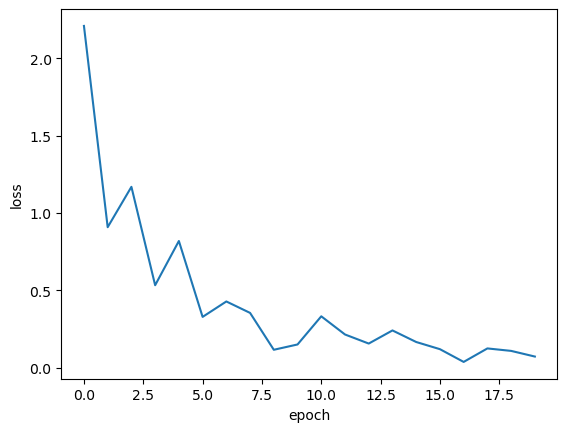

In [58]:
#下面改变学习率
w,loss=SGD(train_set,0.04,True,1e-5,20,10)
#测试
print('训练集正确率：')
eval(train_set,w)
print('测试集正确率：')
eval(test_set,w)
print('训练集为：')
draw(train_set,w)
print('测试集为：')
draw(test_set,w)
#下面是画loss函数
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

训练集正确率：
正确率为:100.0%
测试集正确率：
正确率为:100.0%
训练集为：


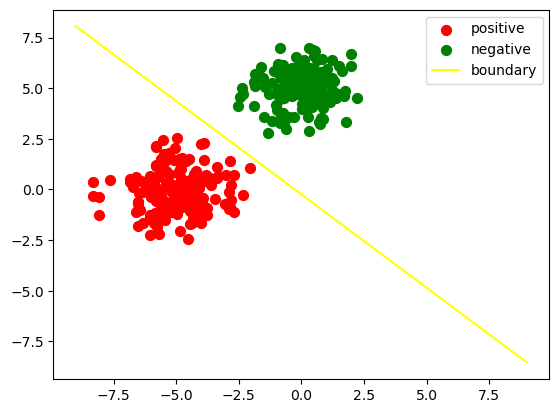

测试集为：


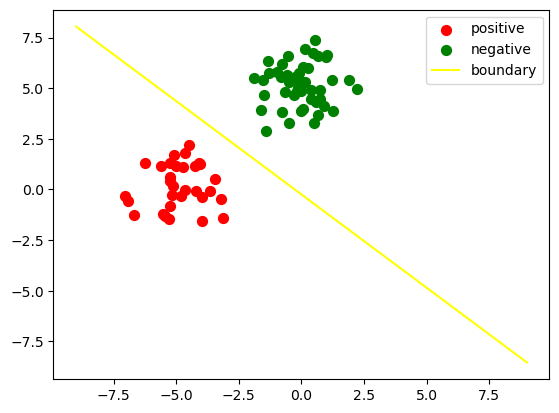

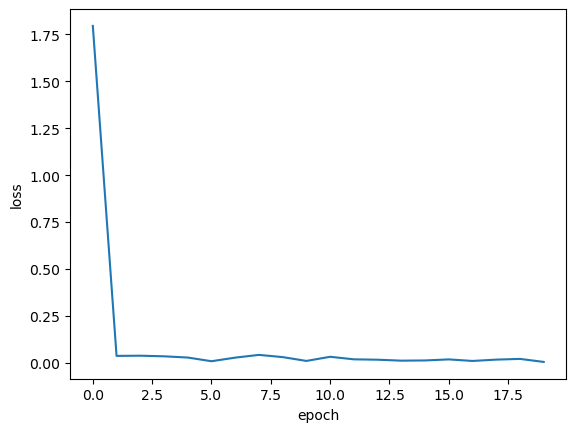

In [59]:
#下面改变batch_size
w,loss=SGD(train_set,0.4,True,1e-5,20,20)
#测试
print('训练集正确率：')
eval(train_set,w)
print('测试集正确率：')
eval(test_set,w)
print('训练集为：')
draw(train_set,w)
print('测试集为：')
draw(test_set,w)
#下面是画loss函数
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

训练集正确率：
正确率为:100.0%
测试集正确率：
正确率为:100.0%
训练集为：


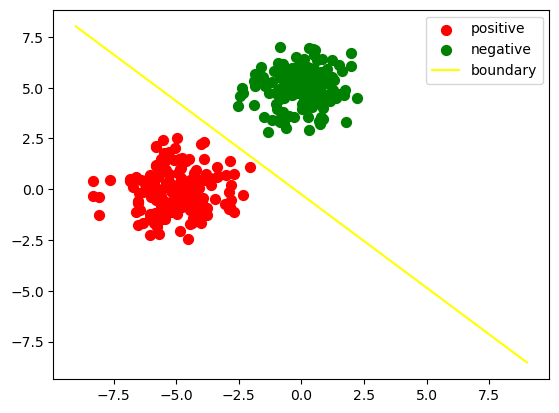

测试集为：


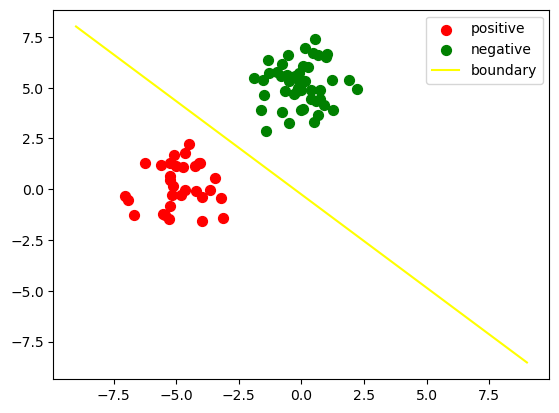

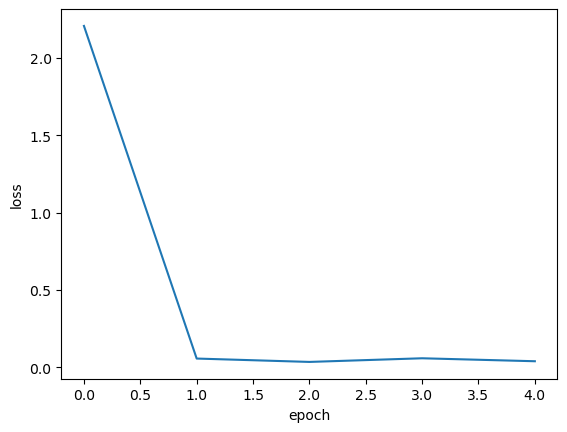

In [60]:
#改变迭代次数
w,loss=SGD(train_set,0.4,True,1e-5,5,10)
#测试
print('训练集正确率：')
eval(train_set,w)
print('测试集正确率：')
eval(test_set,w)
print('训练集为：')
draw(train_set,w)
print('测试集为：')
draw(test_set,w)
#下面是画loss函数
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

shape of dataset: (400, 4)
训练集正确率：
正确率为:72.8125%
测试集正确率：
正确率为:81.25%
训练集为：


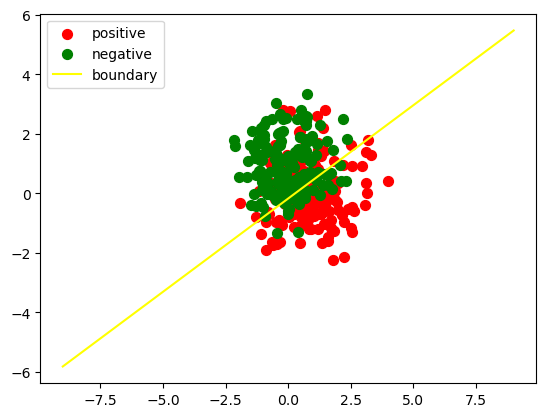

测试集为：


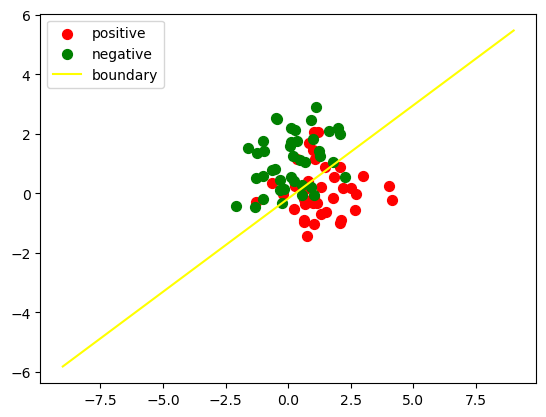

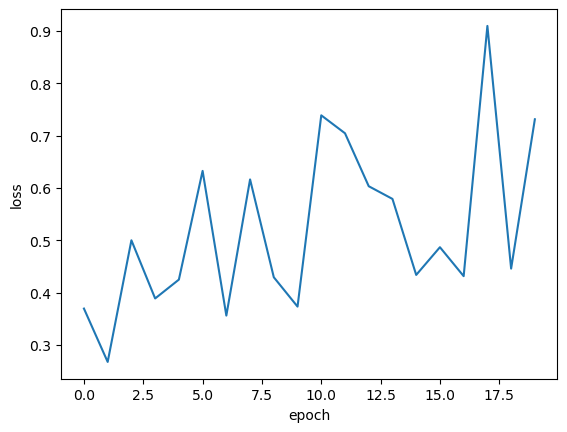

In [61]:
#下面改变样本分布
source_data=get_dataset(200,[1,0],[[1,0],[0,1]],[0,1],[[1,0],[0,1]])
print('shape of dataset:',source_data.shape)
#数据集划分
train_set=source_data[0:320]
test_set=source_data[320:]
w,loss=SGD(train_set,0.4,True,1e-5,20,10)
#测试
print('训练集正确率：')
eval(train_set,w)
print('测试集正确率：')
eval(test_set,w)
print('训练集为：')
draw(train_set,w)
print('测试集为：')
draw(test_set,w)
#下面是画loss函数
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

shape of dataset: (400, 4)
训练集正确率：
正确率为:77.8125%
测试集正确率：
正确率为:80.0%
训练集为：


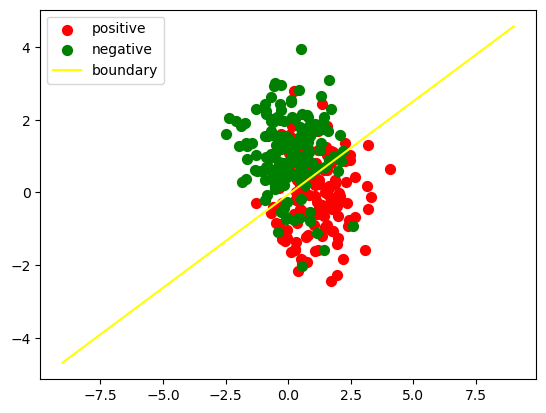

测试集为：


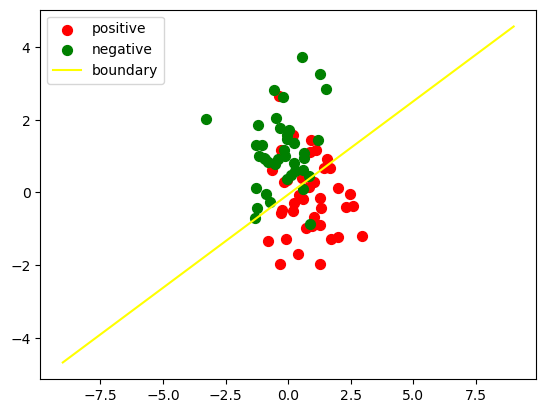

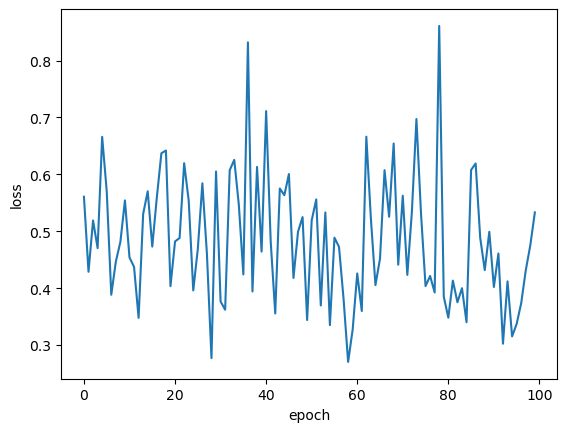

In [65]:
#在改变分布的基础上改变学习率和迭代次数
source_data=get_dataset(200,[1,0],[[1,0],[0,1]],[0,1],[[1,0],[0,1]])
print('shape of dataset:',source_data.shape)
#数据集划分
train_set=source_data[0:320]
test_set=source_data[320:]
w,loss=SGD(train_set,0.001,True,1e-5,100,20)
#测试
print('训练集正确率：')
eval(train_set,w)
print('测试集正确率：')
eval(test_set,w)
print('训练集为：')
draw(train_set,w)
print('测试集为：')
draw(test_set,w)
#下面是画loss函数
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()